In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
sb.set_palette(sb.color_palette("Set2"))

# Additional Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import xgboost as xgb # Run "!pip install xgboost"

# Import the Clean Dataset
df = pd.read_csv('datasets/student-dropout-academic-success-clean.csv')
student_df = df.iloc[:,[1, 13, 14, 15, 16, 17, 22, 23, 28, 29, 34]].copy()
student_df["Target"] = student_df["Target"].map({
    "Dropout": 1,
    "Graduate": 0
})

In [2]:
predictors = student_df.iloc[:, 0:10] # Predictors
response = student_df.iloc[:, -1] # Response = Target

# Partition Dataset into 2 random portions - 80% Train, 20% Test
predictors_train, predictors_test, response_train, response_test = train_test_split(predictors, response, test_size = 0.2)

In [3]:
# Check sample sizes
print("Train Set :", predictors_train.shape, response_train.shape)
print("Test Set  :", predictors_test.shape, response_test.shape)

Train Set : (2904, 10) (2904,)
Test Set  : (726, 10) (726,)


#### Machine Learning Model

**Models:**
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- AdaBoost
- XGBoost

**Metric:**
- Accuracy Score with CV
- Precision Score
- Recall Score
- Explained Variance (R^2)
- Root Mean Squared Error (RMSE)

#### Logistic Regression

In [ ]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(predictors_train, response_train)

In [ ]:
# Coefficients of the Logistic Regression line
print('Coefficients \t: a = ', logreg.coef_)
print('Intercept \t: b = ', logreg.intercept_)

In [ ]:
response_train_pred = logreg.predict(predictors_train)
response_test_pred = logreg.predict(predictors_test)

In [ ]:
# TODO: Plot confusion matrix

In [ ]:

scores = cross_val_score(logreg, predictors_train, response_train, cv=10)
mse_train = np.mean(np.square(np.array(response_train) - np.array(response_train_pred)))

print("Explained Variance (R^2):", logreg.score(predictors_train, response_train))
print("Mean Squared Error (MSE):", mse_train)
print("Root Mean Squared Error (RMSE):", np.sqrt(mse_train), "\n")

print("Accuracy Score without CV: ",accuracy_score(response_test, response_test_pred))
print("Accuracy Score with CV: ",scores.mean())
print("Precision Score: ", precision_score(response_test, response_test_pred, average = 'macro'))
print("Recall Score: ", recall_score(response_test, response_test_pred, average = 'macro'))
print("F1 Score: ", f1_score(response_test, response_test_pred, average = 'macro'))

#### Decision Tree Classifier

In [ ]:
dectree = DecisionTreeClassifier()
dectree.fit(predictors_train, response_train)

In [ ]:
response_train_pred = dectree.predict(predictors_train)
response_test_pred = dectree.predict(predictors_test)

In [ ]:
scores = cross_val_score(dectree, predictors_train, response_train, cv=10)
mse_train = np.mean(np.square(np.array(response_train) - np.array(response_train_pred)))

print("Explained Variance (R^2):", dectree.score(predictors_train, response_train))
#print("Mean Squared Error (MSE):", mse_train)
print("Root Mean Squared Error (RMSE):", np.sqrt(mse_train), "\n")

#print("Accuracy Score without CV: ",accuracy_score(response_test, response_test_pred))
print("Accuracy Score with CV: ",scores.mean())
print("Precision Score: ", precision_score(response_test, response_test_pred, average = 'macro'))
print("Recall Score: ", recall_score(response_test, response_test_pred, average = 'macro'))
#print("F1 Score: ", f1_score(response_test, response_test_pred, average = 'macro'))

#### Random Forest Classifier

In [ ]:
randfclf = RandomForestClassifier(max_depth = 10, random_state = 0)
randfclf.fit(predictors_train, response_train)

In [ ]:
response_train_pred = randfclf.predict(predictors_train)
response_test_pred = randfclf.predict(predictors_test)

In [ ]:
scores = cross_val_score(randfclf, predictors_train, response_train, cv=10)
mse_train = np.mean(np.square(np.array(response_train) - np.array(response_train_pred)))

print("Explained Variance (R^2):", randfclf.score(predictors_train, response_train))
print("Mean Squared Error (MSE):", mse_train)
print("Root Mean Squared Error (RMSE):", np.sqrt(mse_train), "\n")

print("Accuracy Score without CV: ",accuracy_score(response_test, response_test_pred))
print("Accuracy Score with CV: ",scores.mean())
print("Precision Score: ", precision_score(response_test, response_test_pred, average = 'macro'))
print("Recall Score: ", recall_score(response_test, response_test_pred, average = 'macro'))
print("F1 Score: ", f1_score(response_test, response_test_pred, average = 'macro'))

In [ ]:
clf.feature_importance_

#### AdaBoost

In [4]:
# Create AdaBoost model and fit it to the training data
ada = AdaBoostClassifier(n_estimators = 100, learning_rate = 1)
ada.fit(predictors_train, response_train)

# Predict on test set
ada_response_test_pred = ada.predict(predictors_test)

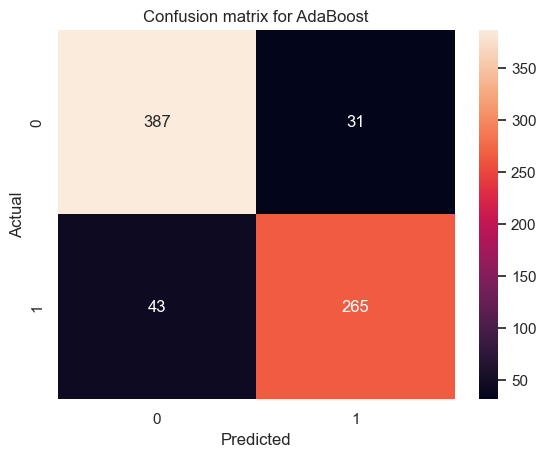

In [5]:
# Plot Confusion Matrix for AdaBoost Machine Learning Model
sb.heatmap(confusion_matrix(response_test, ada_response_test_pred), annot = True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for AdaBoost')
plt.show()

In [6]:
# Evaluate Evaluation Metrics
ada_scores = cross_val_score(ada, predictors, response, cv = 10, scoring = "accuracy")
ada_mse = np.mean(np.square(np.array(response_test) - np.array(ada_response_test_pred)))

print("AdaBoost Machine Learning Model\n")
print("Explained Variance (R^2):\t", ada.score(predictors_test, response_test))
print("Root Mean Squared Error (RMSE):\t", np.sqrt(ada_mse))
print("Accuracy Score with CV:\t\t", ada_scores.mean())
print("Precision Score:\t\t", precision_score(response_test, ada_response_test_pred, average = "macro"))
print("Recall Score:\t\t\t", recall_score(response_test, ada_response_test_pred, average = "macro"))

AdaBoost Machine Learning Model

Explained Variance (R^2):	 0.8980716253443526
Root Mean Squared Error (RMSE):	 0.3192622349349315
Accuracy Score with CV:		 0.8895316804407714
Precision Score:		 0.8976351351351352
Recall Score:			 0.8931134654818865


#### XGBoost

In [7]:
# Create XGBoost model and fit it to the training data
xg = xgb.XGBClassifier(learning_rate = 0.1, n_estimators = 100)
xg.fit(predictors_train, response_train)

# Predict on test set
xg_response_test_pred = xg.predict(predictors_test)

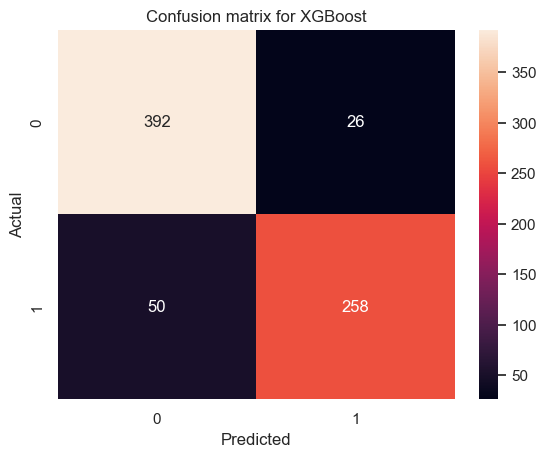

In [8]:
# Plot Confusion Matrix for XGBoost Machine Learning Model
sb.heatmap(confusion_matrix(response_test, xg_response_test_pred), annot = True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for XGBoost')
plt.show()

In [9]:
# Evaluate Evaluation Metrics
xg_scores = cross_val_score(xg, predictors, response, cv = 10, scoring = "accuracy")
xg_mse = np.mean(np.square(np.array(response_test) - np.array(xg_response_test_pred)))

print("XGBoost Machine Learning Model\n")
print("Explained Variance (R^2):\t", xg.score(predictors_test, response_test))
print("Root Mean Squared Error (RMSE):\t", np.sqrt(xg_mse))
print("Accuracy Score with CV:\t\t", xg_scores.mean())
print("Precision Score:\t\t", precision_score(response_test, xg_response_test_pred, average = "macro"))
print("Recall Score:\t\t\t", recall_score(response_test, xg_response_test_pred, average = "macro"))

XGBoost Machine Learning Model

Explained Variance (R^2):	 0.8953168044077136
Root Mean Squared Error (RMSE):	 0.32354782581913066
Accuracy Score with CV:		 0.8955922865013773
Precision Score:		 0.8976642661398253
Recall Score:			 0.8877306903622693
